# Wave Divisor Function Error Simulation.

The error in the wave divisor function depends on direct neighbor divisors ([Question SE][1]). For narrow
pulsewidths: $\Delta x$ is small the error will reduce. Every wavepulse can contribute a maximum
error of: $max(\varepsilon)$.

$$ max(\varepsilon)=exp \left( \frac{\log(L)}{\Delta x^2}      \right)$$

The total error is the cosine summation of all neighbor divisors $(x-1)$ and $(x+1)$.


$$
\varepsilon (x)= max(\varepsilon) \cdot \left[ \sum_{\mathbb{X}\vert(x-1)} a \cdot \cos \left( \frac{N \pi }{\mathbb{X} } \right)  + \sum_{\mathbb{X}\vert(x+1)} a \cdot \cos \left( \frac{N \pi }{\mathbb{X} } \right)     \right]   
\label{eq: error_standard} \tag{1}
$$

Here $\mathbb{X} \vert (x-1)$ means: $\mathbb{X}$ divides $(x-1)$. Basically the divisors are added from the neighbors of $x$ like (simplified):

$$\varepsilon (9) = \cos(k1)+\cos(k2)+\cos(k4)+\cos(k8)+\cos(k1)+\cos(k2)+\cos(k5)+\cos(k10)$$

$N$ and the amplitude $a$ can be calculated with:

$$ N(\mathbb{X})= \frac{\log (L)}{\log \left(  \cos \left(  \frac {\pi}{\mathbb{X} } \Delta x  \right)\right)}  \quad where: \quad N(\mathbb{X}) \in 2 \mathbb{N} $$

$$ a(\mathbb{X})= \cos^{N} \left(  \frac{\pi}{\mathbb{X}}   \right) \bigg / max(\varepsilon) $$

The amplitude $a(\mathbb{X})$ will decrease for smaller divisors $\mathbb{X}$. $N(\mathbb{X})$ is determined by the pulsewidth and rounded to its closest even integer. The divisors of a number are expected to be random. Also rounding of  $N(\mathbb{X})$ will cause an randomizing effect. The error is expected to follow a: Random walk / Brownian motion over an arcsine distribution (with variance: $0.5$). The growth in the error can be approximated. It was found that the growth is related to the mean divisor growth by Dirichlet (note: 1 is not included as divisor).

$$Var(\varepsilon(x)) \approx \frac{1}{2} \cdot \left[ \sigma_{0}(x-1) +  \sigma_{0}(x+1)    \right]$$

$$ Stdev(\sigma_{0}) \approx  \cdot \sqrt{\log(x)+ 2 \gamma -2}
 \label{eq: Stdev} \tag{2}
 $$

The error description $\eqref{eq: error_standard}$ can be approximated for large numbers by:

 $$\varepsilon (x) \approx max(\varepsilon) \cdot \left[ \sum_{\mathbb{X}\vert (x-1)}^{} \cos(k \mathbb{X}) + \sum_{\mathbb{X}\vert (x+1)}^{} \cos(k \mathbb{X}) \right]
 \label{eq: error_approx} \tag{3}
 $$

Where $k$ is a constant and determined by the pulse width.

$$ k=-\frac{2 \log(L)}{\pi \Delta x^{2}}$$

Resonation can occur when $k$ is a multiple of $\pi$. 

$$ k=-\frac{2 \log(L)}{\pi \Delta x^{2}}=\phi \pi$$

$$ \phi=-\frac{2 \log(L)}{\pi^{2} \Delta x^{2}}
\label{eq: phi} \tag{4}
$$

When $\phi$ is an integer resonation between error waves can occur. For typical arcsine distributions see link [Jupyter ArcSine Distr][3].

A simulation has been made calculating the “standard error” $\eqref{eq: error_standard}$ and “approximated error” $\eqref{eq: error_approx}$. Earlier error analysis showed that the distribution $\varepsilon(x)$ varies depending upon $𝑥$ being odd (skewed distribution) or even (symmetrical distribution). So I know partity has a effect. Also observed for $x$ is even: Twin Primes cause a peak arround 0.

Question:
Does the error follow a random walk over an arsine distribution (for odd or even $x$)? Till 1.000.000 $\eqref{eq: Stdev}$ holds pretty good.

More information: [Question Wave Divisor Function][1], [Jupyter Error Sim][2], [Jupyter ArcSine Distr][3]

[1]: https://math.stackexchange.com/q/3427431/650339
[2]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Error.ipynb
[3]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20Arcsine.ipynb


In [1]:
import numpy as np
import scipy.stats as stats
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


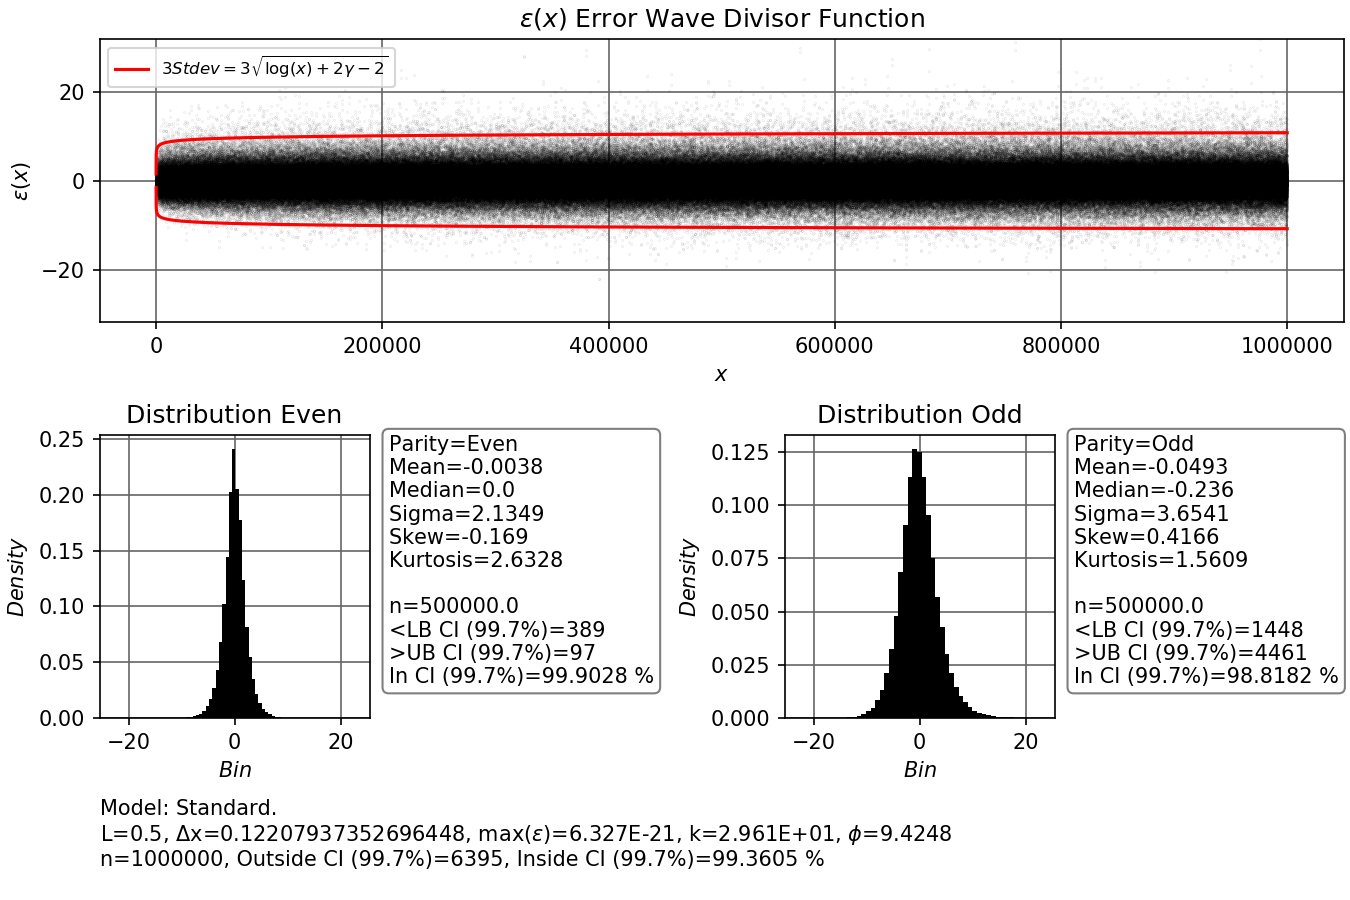

interactive(children=(BoundedFloatText(value=0.2, description='$\\Delta x$:'), Dropdown(description='$L$:', in…

In [3]:
from ipywidgets import IntProgress
from datetime import datetime
from matplotlib import gridspec

#Create Plot grid
fig= plt1.figure(figsize=(9, 6), constrained_layout=True)
widths = [2.25,2.25,2.25,2.25]
heights = [1.5,1.5,0.5]
gs=fig.add_gridspec(3,4,width_ratios=widths, height_ratios=heights, wspace=0.05)

ax1=fig.add_subplot(gs[0,:])
ax1a=fig.add_subplot(gs[1,0])
ax1b=fig.add_subplot(gs[1,1])
ax1c=fig.add_subplot(gs[1,2])
ax1d=fig.add_subplot(gs[1,3])
ax1e=fig.add_subplot(gs[2,:])

def update_plot(dx, L, Range,ModelType):

    start_time = datetime.now()

    #Display progress bar
    f = IntProgress(min=0, max=100, description="")
    display(f)
    
    ax1.clear()
    ax1a.clear()
    ax1b.clear()
    ax1c.clear()
    ax1d.clear()
    ax1e.clear()

    #Disable axis textfield plot
    ax1b.axis('off')
    ax1d.axis('off')
    ax1e.axis('off')
    
    xodd=[]
    yodd=[]
    xeven=[]
    yeven=[]
    
    #Calculate Error max and k.
    emax=np.exp(np.log(L)/(dx**2))
    k=-2*np.log(L)/(np.pi*dx**2)
    
    
    phi=-2*np.log(L)/((dx**2)*(np.pi**2))
    #print("dx: " + str(dx))
    
    #Divisors Odd and Even Divisors. For Different error approximations.
    if ModelType=="Standard" :
        i=3
        while i <= Range:

            if ((i % 2)==0) :
                xeven.append(i)
                s1=getSumError(i-1,L,dx,emax)
                s2=getSumError(i+1,L,dx,emax)
                yeven.append(s1+s2)
            else :
                xodd.append(i)
                s1=getSumError(i-1,L,dx,emax)
                s2=getSumError(i+1,L,dx,emax)
                yodd.append(s1+s2)        

            i = i + 1

            if (i % (Range/100)==0) :
                    f.value += 1        

    else :
        i=3
        while i <= Range:

            if ((i % 2)==0) :
                xeven.append(i)
                s1=getSumErrorApprox(i-1,k)
                s2=getSumErrorApprox(i+1,k)
                yeven.append(s1+s2)
            else :
                xodd.append(i)
                s1=getSumErrorApprox(i-1,k)
                s2=getSumErrorApprox(i+1,k)
                yodd.append(s1+s2)        

            i = i + 1

            if (i % (Range/100)==0) :
                    f.value += 1                      
                    
    #Count odd within CI
    ctoddlb=lbCI(3,2,yodd)          
    ctoddub=ubCI(3,2,yodd)          
    
    #Count even within CI
    ctevenlb=lbCI(4,2,yeven)
    ctevenub=ubCI(4,2,yeven)
    
    #Calculate 3Stdev        
    xG = np.linspace(3,Range,Range-1)
    yGpos=np.sqrt(np.log(xG)-0.84558)*3
    yGneg=-np.sqrt(np.log(xG)-0.84558)*3
    
    #Determine minima and maxima of both yodd and yeven
    lim=np.max([abs(np.max(yodd)),abs(np.min(yodd)),abs(np.max(yeven)),abs(np.min(yeven))])
    
    #Plot datapoints yodd and yeven. Plot 3stdev lines
    ax1.plot(xodd, yodd, marker='.',markersize=(markersize(Range)), color='black', linestyle='')
    ax1.plot(xeven, yeven, marker='.',markersize=(markersize(Range)), color='black', linestyle='')
    ax1.plot(xG, yGpos, marker='',markersize=1, color='red', linestyle='-', label="$3Stdev=3\sqrt{\log(x)+2\gamma-2}$")
    ax1.plot(xG, yGneg, marker='',markersize=1, color='red', linestyle='-')
    ax1.legend(loc='upper left',fontsize=8)
    ax1.set_title('$\epsilon(x)$ Error Wave Divisor Function')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$\epsilon(x)$')
    ax1.grid(b=True, which='major', color='#666666', linestyle='-')
    ax1.set(ylim=(-1*lim,1*lim))
 
    #Plot histogram error even numbers
    ax1a.hist(yeven, density=True, bins=60, rwidth=1, color='black', edgecolor='white', linewidth=0, zorder=5)
    ax1a.set(xlim=(-0.8*lim,0.8*lim))
    ax1a.set_xlabel('$Bin$')
    ax1a.set_ylabel('$Density$')
    ax1a.set_title('Distribution Even')
    ax1a.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)

    #Plot histogram error odd numbers
    ax1c.hist(yodd, density=True, bins=60, rwidth=1, color='black', edgecolor='white', linewidth=0, zorder=5)
    ax1c.set(xlim=(-0.8*lim,0.8*lim))
    ax1c.set_xlabel('$Bin$')
    ax1c.set_ylabel('$Density$')
    ax1c.set_title('Distribution Odd')
    ax1c.grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)
    
    #Plot summary yeven
    textstr = 'Parity={} \nMean={} \nMedian={} \nSigma={} \nSkew={} \nKurtosis={} \
    \n\nn={} \n<LB CI (99.7%)={} \n>UB CI (99.7%)={} \nIn CI (99.7%)={} %'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    la="Even"
    me=round(np.mean(yeven),4)
    md=round(np.median(yeven),4)
    sd=round(np.std(yeven),4)
    sk=round(stats.skew(yeven),4)
    kt=round(stats.kurtosis(yeven),4)
    n=round(0.5*Range,4)
    lb=round(ctevenlb,4)
    ub=round(ctevenub,4)
    pc=round((100-100*(ctevenlb+ctevenub)/(0.5*Range)),4)
    
    # Even Numbers place a text box in upper left in axes coords
    ax1b.text(0, 1, textstr.format(la,me,md,sd,sk,kt,n,lb, ub, pc),
              transform=ax1b.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    #Plot summary yodd
    la="Odd"
    me=round(np.mean(yodd),4)
    md=round(np.median(yodd),4)
    sd=round(np.std(yodd),4)
    sk=round(stats.skew(yodd),4)
    kt=round(stats.kurtosis(yodd),4)
    n=round(0.5*Range,4)
    lb=round(ctoddlb,4)
    ub=round(ctoddub,4)
    pc=round((100-100*(ctoddlb+ctoddub)/(0.5*Range)),4)
    
    # Odd Numbers place a text box in upper left in axes coords
    ax1d.text(0, 1, textstr.format(la,me,md,sd,sk,kt,n,lb, ub, pc),
              transform=ax1d.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    
   
    #Total summary.
    textstr = 'Model: {}. \nL={}, $\Delta$x={}, max($\epsilon$)={}, k={}, $\phi$={} \nn={}, Outside CI (99.7%)={}, Inside CI (99.7%)={} %'
        
    em=format(emax,".3E")
    k=format(k,".3E")
    phi=round(phi,4)
    oCI=round(ctevenub+ctoddub+ctevenlb+ctoddlb,4)
    tCI=round((100-100*(ctevenub+ctoddub+ctevenlb+ctoddlb)/(Range)),4)

    ax1e.text(0, 1, textstr.format(ModelType,L,dx,em,k,phi,Range,oCI,tCI),
              transform=ax1e.transAxes, fontsize=10, verticalalignment='top')
    
    #plt1.tight_layout()
    plt1.show()
    plt1.savefig('WDF_dx='+ str(dx) +'_L=' + str(L) + '_n='+ str(Range) +'.png', dpi=300, bbox_inches='tight')

    f.close()

    print("Calculation Time: " + str(round(timesec(start_time),1))+" seconds")
    
#Function summation error according standard model. 
def getSumError(n,L,dx,emax): 
    
    sume=0
    # Note that this loop runs till square root 
    i=2
    while i <= np.sqrt(n): 
          
        if (n % i == 0) :

            # If divisors are equal, print only one 
            if (n / i == i) : 
                N=np.log(L)/np.log(np.cos(np.pi*dx/i))
                N=2*(np.round(N*0.5,0))
                a=((np.cos(np.pi/i))**N)/emax
                sume=sume+a*np.cos(N*np.pi/i)
            else : 
                N=np.log(L)/np.log(np.cos(np.pi*dx/i))
                N=2*(np.round(N*0.5,0))
                a=((np.cos(np.pi/i))**N)/emax
                sume=sume+a*np.cos(N*np.pi/i)
                
                N=np.log(L)/np.log(np.cos(np.pi*dx/(n/i)))
                N=2*(np.round(N*0.5,0))
                a=((np.cos(np.pi/(n/i)))**N)/emax
                sume=sume+a*np.cos(N*np.pi/(n/i))
                
        i = i + 1             
    return sume

#Function summation error according approximated model. 
def getSumErrorApprox(n,k): 
    
    sume2=0
    # Note that this loop runs till square root 
    i =2
    while i <= np.sqrt(n): 
          
        if (n % i == 0) : 
      
            # If divisors are equal, print only one 
            if (n / i == i) : 
                sume2=sume2+np.cos(k*i)
            else : 
                # Otherwise print both 
                #print(i , n/i),
                sume2=sume2+np.cos(k*i)
                sume2=sume2+np.cos(k*(n/i))
                
        i = i + 1             
    return sume2


# returns the elapsed milliseconds since the start of the program
def timesec(start_time):
   dt = datetime.now() - start_time
   ms = (dt.days * 24 * 60 * 60 + dt.seconds)  + dt.microseconds /1000000
   return ms

#Count the number above upper bound
def ubCI(xstart,step,y):
    #Count even: xstart=4, odd xstart=3
    r=xstart
    ct=0
    for i in y:
        
        #ub upperbound and lowerbound
        UB=np.sqrt(np.log(r)-0.84558)*3
        LB=-np.sqrt(np.log(r)-0.84558)*3    
        r=r+step
        
        if i>=UB :
            ct=ct+1             
    return ct

#Count the number below lower bound
def lbCI(xstart,step,y):
    #Count even: xstart=4, odd xstart=3
    r=xstart
    ct=0
    for i in y:
        
        #ub upperbound and lowerbound
        UB=np.sqrt(np.log(r)-0.84558)*3
        LB=-np.sqrt(np.log(r)-0.84558)*3    
        r=r+step
        
        if i<=LB:
            ct=ct+1             
    return ct


def markersize(range):
    switcher={
            1000:3,
            2500:2,
            5000:2,
            7500:1,
            10000:1,
            25000:0.4,
            50000:0.4,
            75000:0.3,
            100000:0.2,
            250000:0.08,
            500000:0.08,
            750000:0.06,
            1000000:0.06
    }
    return switcher.get(range,0.5)

dxlist=np.arange(50,201,1)/1000
#dx = widgets.Dropdown(options=dxlist, value=0.2, description='$\Delta x$:')  
#mode = widgets.Dropdown(options=['Phi','dx'], value='dx', description='$Mode$:') 
dx= widgets.BoundedFloatText(value=0.2, description='$\Delta x$:') 
L = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:') 
Range = widgets.Dropdown(options=[1000,2500,5000,7500,10000,25000,50000,75000,100000,250000, 500000, 750000, 1000000, 5000000], value=10000, description='$Range$:') 
ModelType = widgets.Dropdown(options=['Standard','Approximation'], value='Standard', description='$Model$:') 
widgets.interactive(update_plot, dx=dx, L=L, Range=Range,ModelType=ModelType)


# Resonation factor $\phi$ calculator.

In [4]:
def update_plot(phi, L1):

    dx1= np.sqrt(-2*np.log(L1)/(phi*(np.pi**2)))
    print('dx: ' + str(dx1))
    
phi = widgets.BoundedFloatText(value=10, min=0, max=1000000000000, description='$\phi$:') 
L1 = widgets.Dropdown(options=[0.10,0.15, 0.20,0.25,0.30,0.35,0.40,0.45,0.5], value=0.5, description='$L$:')
q=widgets.FloatText(value=10, description='$\Delta x$:', disabled=False)

widgets.interactive(update_plot, phi=phi, L1=L1)

interactive(children=(BoundedFloatText(value=10.0, description='$\\phi$:', max=1000000000000.0), Dropdown(desc…

https://www.geeksforgeeks.org/find-divisors-natural-number-set-1/